In [2]:
# Tasks
#  ● TimeSeries Exploratory Data Analysis
#  ● Next day/week/month sales
#  ● Specific customer purchases

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
 #pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
data = pd.read_csv('COFFEE_SALES.csv')
data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [16]:
data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [18]:
data.duplicated().sum()

0

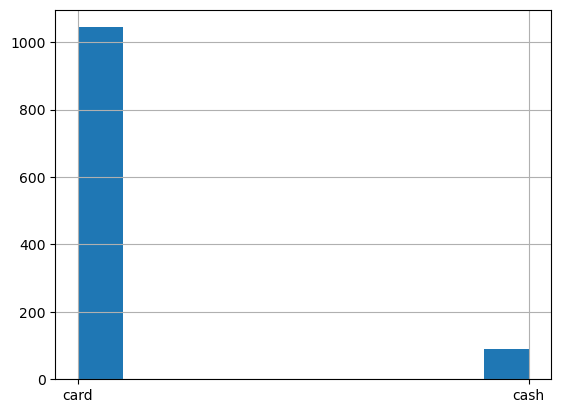

In [26]:
plt.hist(data['cash_type'])
plt.grid(True)

In [50]:
data['cash_type'].value_counts()

cash_type
card    1044
cash      89
Name: count, dtype: int64

In [52]:
data['coffee_name'].value_counts()

coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64

In [62]:
#total revenue
revenue = data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)
revenue

,coffee_name,money
7,Latte,9009.14
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
0,Americano,4644.54
6,Hot Chocolate,2778.48
4,Cortado,2745.08
3,Cocoa,1295.94
5,Espresso,1100.62


Text(0.5, 1.0, 'Total Revenue')

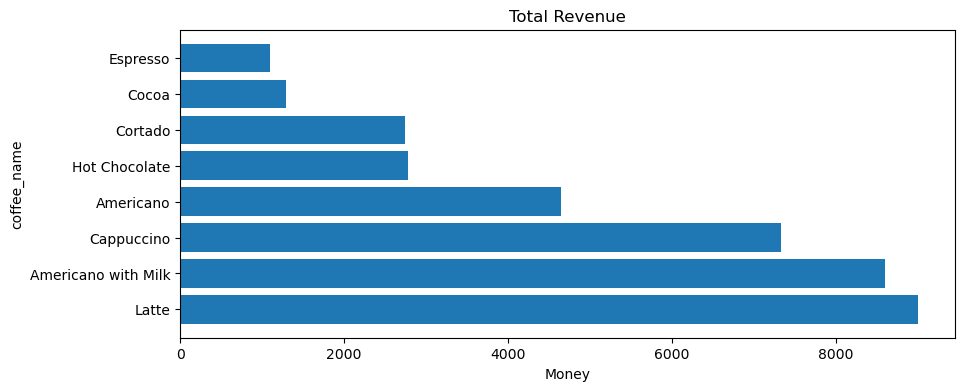

In [70]:
plt.figure(figsize=(10,4))
plt.barh(revenue['coffee_name'],revenue['money'])
plt.xlabel('Money')
plt.ylabel('coffee_name')
plt.title('Total Revenue')

In [72]:
#aswe know the total sales of latte is higher

In [74]:
#monthly sales
data.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [80]:
data['month']=pd.to_datetime(data['date']).dt.month

In [82]:
data['month']

0       3
1       3
2       3
3       3
4       3
       ..
1128    7
1129    7
1130    7
1131    7
1132    7
Name: month, Length: 1133, dtype: int32

In [146]:
monthly_sales = data.groupby(['coffee_name','month']).count()['date'].reset_index().pivot(index='month',columns ='coffee_name',values='date').reset_index()

In [152]:
monthly_sales = monthly_sales.rename(columns={'coffee_name':'Sr.no'})
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,3,36,34,20,6,30,10,22,48
1,4,35,42,43,6,19,7,13,31
2,5,48,58,55,9,17,8,14,58
3,6,14,69,46,5,19,10,14,50
4,7,36,65,32,9,14,14,11,56


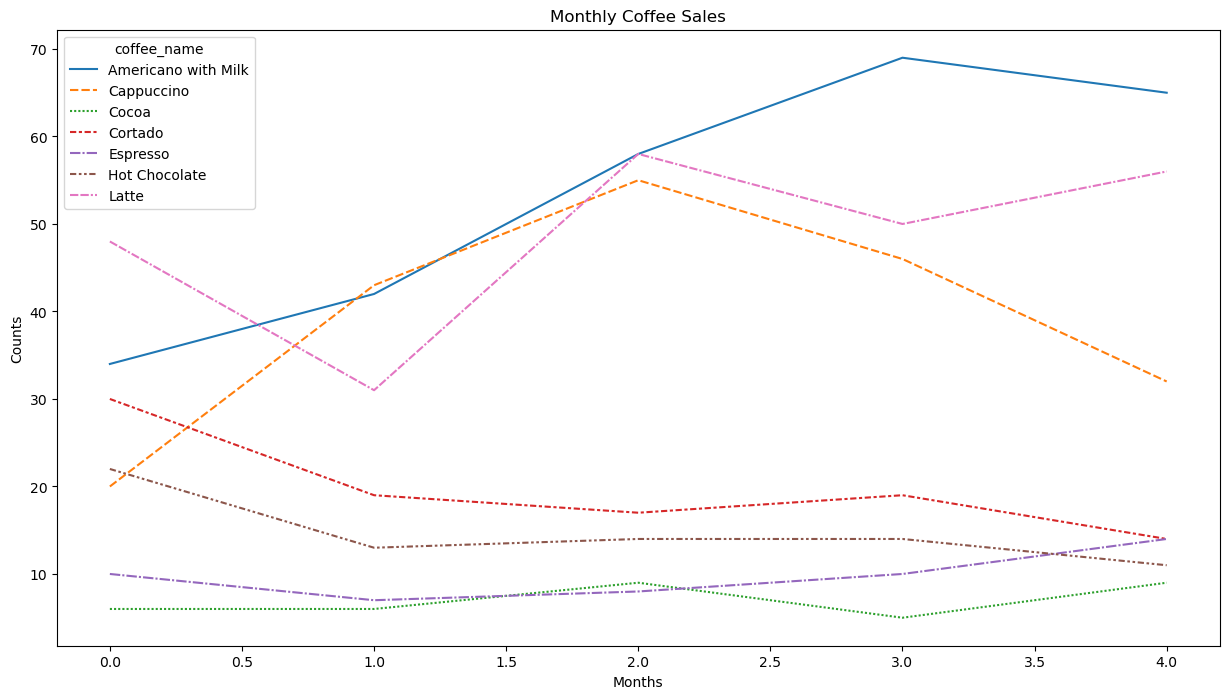

In [190]:
plt.figure(figsize=(15,8))
sns.lineplot(data = monthly_sales.iloc[:,2:])
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Monthly Coffee Sales')
plt.show()



In [188]:
#monthly Sales of Americano with milk is much higher

In [234]:
data.head(15)

,date,datetime,cash_type,card,money,coffee_name,month,day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,1
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,1
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,1
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk,3,1
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate,3,1
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk,3,1
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa,3,1
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk,3,1


In [236]:
#weekly sales
data['day']=pd.to_datetime(data['date']).dt.strftime('%w')

In [238]:
data['day']

0       5
1       5
2       5
3       5
4       5
       ..
1128    3
1129    3
1130    3
1131    3
1132    3
Name: day, Length: 1133, dtype: object

In [240]:
data

,date,datetime,cash_type,card,money,coffee_name,month,day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,3,5
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,5
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,5
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,3,5
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,3,5
...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,7,3
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,7,3
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,7,3
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,7,3


In [242]:
weekly_sales = data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})

In [244]:
weekly_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


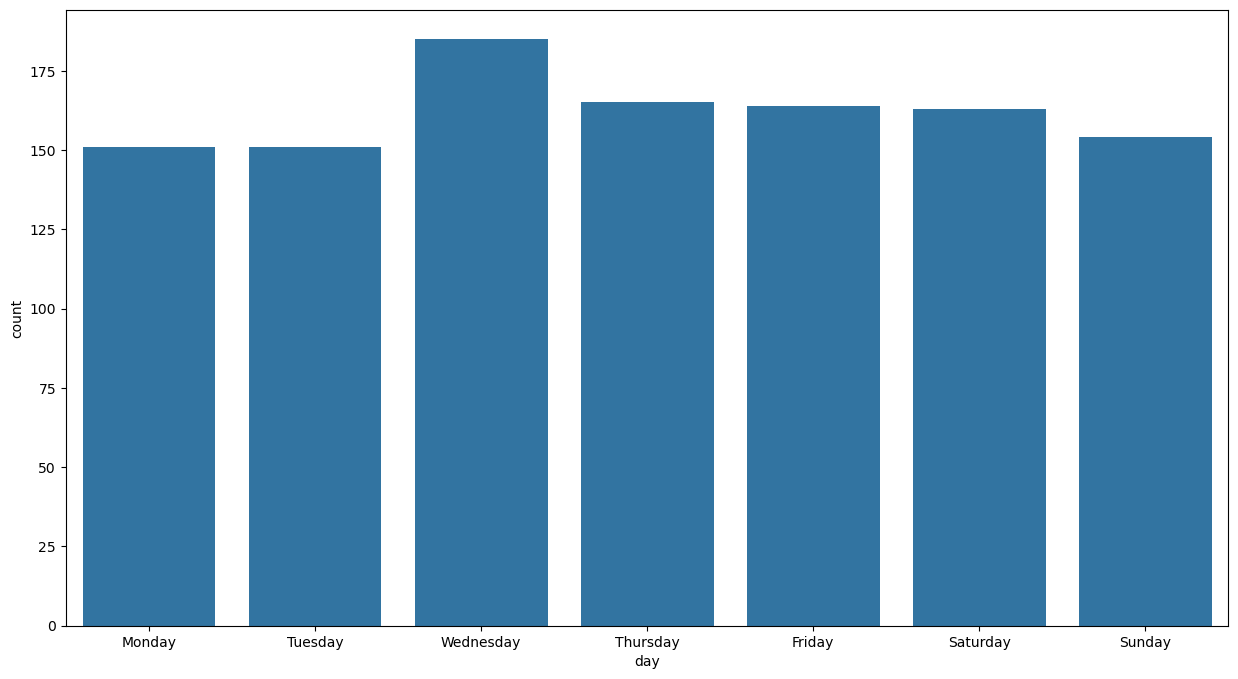

In [270]:
import calendar
calendar.setfirstweekday(calendar.SUNDAY)
days_names=[calendar.day_name[i] for i in range(7)]
plt.figure(figsize =(15,8))
sns.barplot(data = weekly_sales,x='day',y='count')
plt.xticks(range(len(weekly_sales['day'])),days_names)
plt.show()

In [272]:
days_names

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [274]:
#daily sales

In [284]:
daily_sales = data.groupby(['coffee_name','date']).count()['datetime'].reset_index().pivot(index='date',columns='coffee_name',values='datetime').reset_index()

In [286]:
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,NaN,1.0,NaN,NaN,3.0,2.0
1,2024-03-02,3.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
2,2024-03-03,1.0,2.0,NaN,1.0,2.0,NaN,2.0,2.0
3,2024-03-04,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2.0
4,2024-03-05,NaN,NaN,NaN,1.0,1.0,NaN,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,NaN,5.0,4.0,NaN,NaN,2.0,NaN,2.0
146,2024-07-28,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,NaN,NaN,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,NaN,3.0,2.0,NaN,3.0


In [288]:
daily_sales=daily_sales.fillna(0)

In [290]:
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [292]:
daily_sales.iloc[:,1:].describe()

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.126667,1.786667,1.306667,0.233333,0.660000,0.326667,0.493333,1.620000
std,1.216755,1.751650,1.360747,0.483509,0.932846,0.660452,0.888001,1.359382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,5.000000,12.000000,9.000000,2.000000,4.000000,4.000000,4.000000,7.000000


In [326]:
daily_revenue = daily_sales.iloc[:,1:].describe().loc[['min','max'],:]
daily_revenue

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5.0,12.0,9.0,2.0,4.0,4.0,4.0,7.0


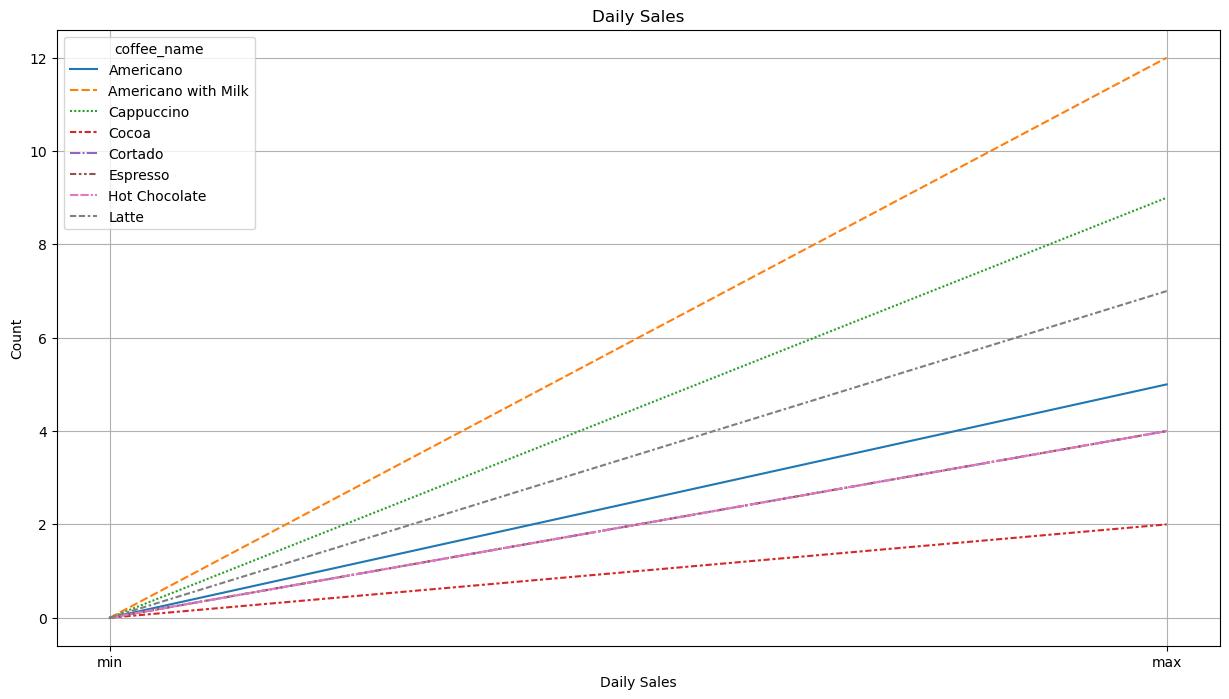

In [332]:
plt.figure(figsize = (15,8))
sns.lineplot(data = daily_revenue)
plt.xlabel('Daily Sales')
plt.ylabel('Count')
plt.title('Daily Sales')
plt.grid(True)
plt.show()

In [342]:
data['hour'] = pd.to_datetime(data['datetime']).dt.hour

In [344]:
data['hour']

0       10
1       12
2       12
3       13
4       13
        ..
1128    20
1129    20
1130    21
1131    21
1132    21
Name: hour, Length: 1133, dtype: int32

In [348]:
#hourly sales
hourly_sales = data.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})

In [350]:
hourly_sales

,hour,count
0,7,13
1,8,44
2,9,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


Text(0.5, 0, 'Hours at AM')

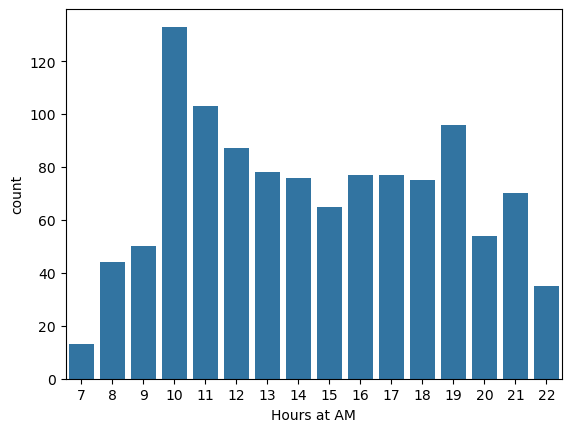

In [358]:
sns.barplot(data= hourly_sales,x = 'hour', y = 'count')
plt.xlabel('Hours at AM')

In [366]:
#hourly sales by coffee
hourly_sales_by_coffee = data.groupby(['hour','coffee_name']).count()['date'].reset_index().pivot(index = 'hour',columns = 'coffee_name',values='date').reset_index()

In [370]:
hourly_sales_by_coffee.fillna(0)

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,7,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
1,8,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
2,9,8.0,16.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0
